# CNN for Happy and Sad Face Classification

## Importing Libraries

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

C:\Users\JS\AppData\Local\Temp\ipykernel_4180\1916308919.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Data Cleaning

In [2]:
data_dir = 'data/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

## Data Augmentation

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    validation_split=0.2,
                                   shear_range = 0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1.0/255,
                                    validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    subset='training',
    target_size=(64, 64),  
    color_mode='grayscale',  
    batch_size=32,
    class_mode='binary',
    shuffle=True) 

val_generator = val_datagen.flow_from_directory(
    data_dir,
    subset='validation',
    target_size=(64, 64),  
    color_mode='grayscale', 
    batch_size=32,
    class_mode='binary',
    shuffle=False) 

Found 12054 images belonging to 2 classes.
Found 3012 images belonging to 2 classes.


## CNN Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [9]:
cnn = Sequential()

In [10]:
cnn.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(64,64,1)))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(32, (3,3), 1, activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(16, (3,3), 1, activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())

cnn.add(Dense(256, activation='relu'))

cnn.add(Dense(1, activation='sigmoid'))

C:\Users\JS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,393 (614.82 KB)

 Trainable params: 157,393 (614.82 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
logdir='data/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [14]:
hist = cnn.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[tensorboard_callback])

Epoch 1/20


C:\Users\JS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 114ms/step - accuracy: 0.6140 - loss: 0.6526 - val_accuracy: 0.7148 - val_loss: 0.5446
Epoch 2/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 178s 466ms/step - accuracy: 0.7200 - loss: 0.5466 - val_accuracy: 0.7407 - val_loss: 0.4969
Epoch 3/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.7579 - loss: 0.4891 - val_accuracy: 0.7669 - val_loss: 0.4653
Epoch 4/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.7684 - loss: 0.4695 - val_accuracy: 0.7663 - val_loss: 0.4538
Epoch 5/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - accuracy: 0.7898 - loss: 0.4259 - val_accuracy: 0.7975 - val_loss: 0.4083
Epoch 6/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 58s 153ms/step - accuracy: 0.8157 - loss: 0.3947 - val_accuracy: 0.8181 - val_loss: 0.3891
Epoch 7/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 55s 142ms/step - accuracy: 0.8226 - loss: 0.3816 - val_accuracy: 0.8098 - val_loss: 0.3933
Epoch 8/20
377/377 ━━━━━━━━━━━━━━━━━━━━ 50s 131ms/step - accuracy: 0.8336 - loss: 0.3652 - val_a

## Model Accuracy

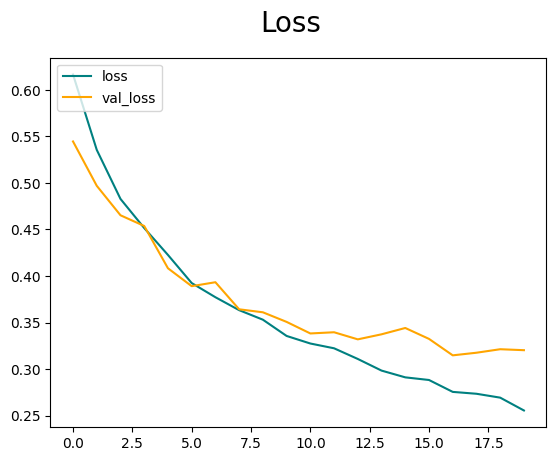

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

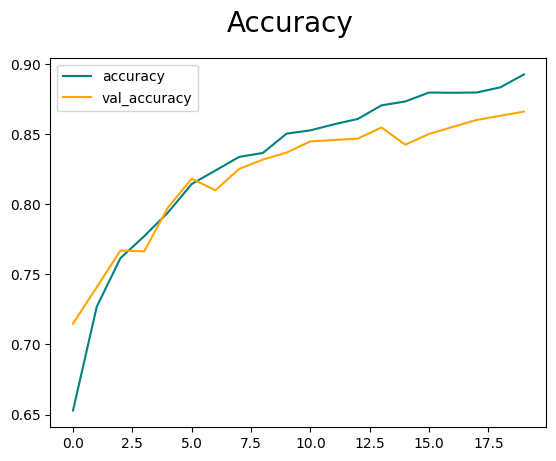

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Testing on Single Prediction

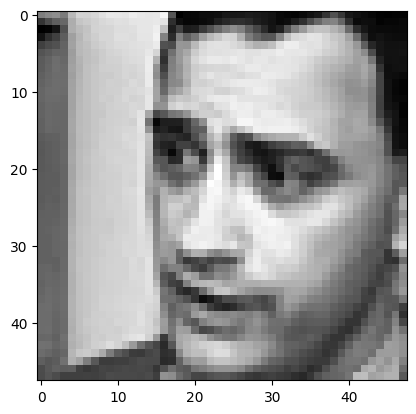

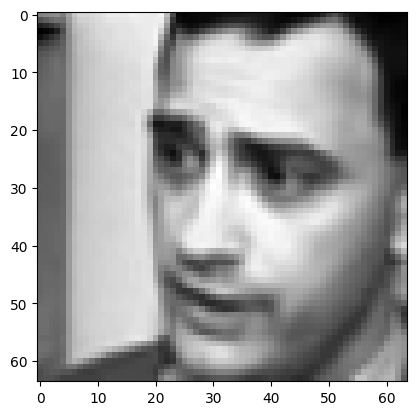

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.9767353]]
Predicted class is Sad


In [43]:
img = cv2.imread('data/s1.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original grayscale image
plt.imshow(img, cmap='gray')
plt.show()

# Expand dimensions to match the model's input shape (height, width, channels)
img_expanded = np.expand_dims(img, axis=-1)  # Convert from (height, width) to (height, width, 1)

# Resize the image to match the model's input shape
resize = tf.image.resize(img_expanded, (64, 64))

# Display the resized image
plt.imshow(resize.numpy().astype(int).squeeze(), cmap='gray')
plt.show()

# Expand dimensions to match the model's expected input shape (batch, height, width, channels)
resize_expanded = np.expand_dims(resize, axis=0)  # Convert from (height, width, channels) to (batch, height, width, channels)
resize_expanded = resize_expanded / 255.0  # Normalize

# Make a prediction
yhat = cnn.predict(resize_expanded)
print(yhat)
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

## Saving Model

In [45]:
cnn.save(os.path.join('models', 'imageclassifier.keras'))